<a href="https://colab.research.google.com/github/phreak1n/Colab/blob/master/_Corona_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corona Data
a project to learn to use jupyter-notebooks




## Todo

* compare cases ans deaths with population

# Code


## setup

### install in colab
install via "!pip install" packages in vm

### imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### setup

In [2]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15 , 10)
plt.xkcd()

### vars

In [3]:
# How many days should be shown in th plot
last_days = 90

urlJSON = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/json'
urlCSV = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'



## programm

### read data

In [4]:
df = pd.read_csv(urlCSV)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37865 entries, 0 to 37864
Data columns (total 12 columns):
dateRep                                                       37865 non-null object
day                                                           37865 non-null int64
month                                                         37865 non-null int64
year                                                          37865 non-null int64
cases                                                         37865 non-null int64
deaths                                                        37865 non-null int64
countriesAndTerritories                                       37865 non-null object
geoId                                                         37704 non-null object
countryterritoryCode                                          37801 non-null object
popData2019                                                   37801 non-null float64
continentExp                                           

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
37860,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
37861,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
37862,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
37863,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
37864,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


### sort data

In [5]:
dfGER = df[(df.countriesAndTerritories == "Germany")]
dfRPC = df[(df.countriesAndTerritories == "China")]
dfUSA = df[(df.countriesAndTerritories == "United_States_of_America")]
dfITA = df[(df.countriesAndTerritories == "Italy")]
dfSPA = df[(df.countriesAndTerritories == "Spain")]
dfFRA = df[(df.countriesAndTerritories == "France")]

### plot data - germany

/var/mobile/Containers/Data/Application/CA76A0C4-C472-4F07-BE38-2611FE0A0BF9/Library/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-macosx-10.9-x86_64.egg/matplotlib/font_manager.py:1242: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


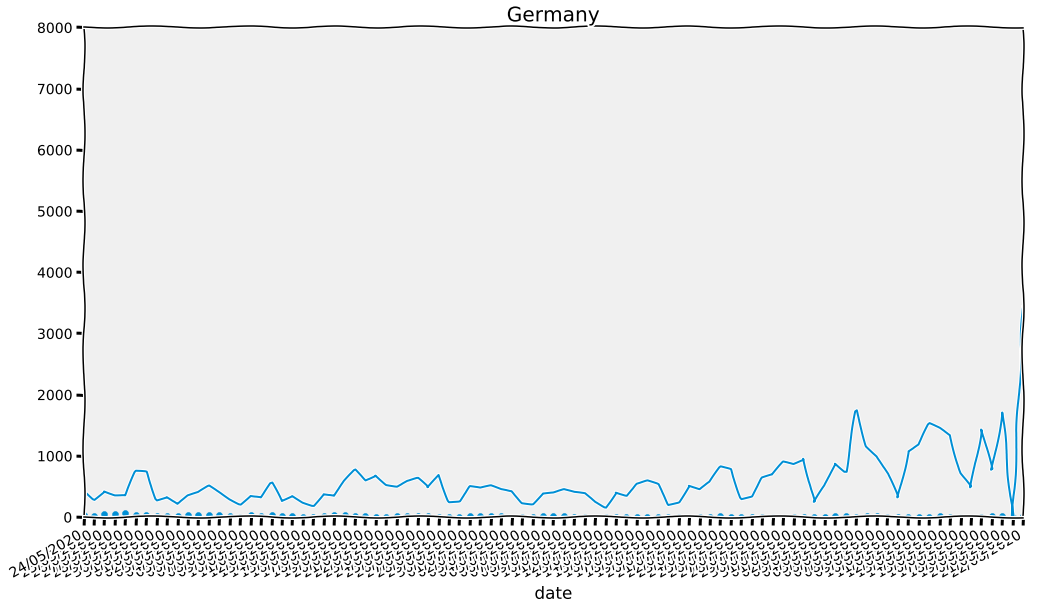

In [6]:
date = dfGER['dateRep']
deaths = dfGER['deaths']
cases = dfGER['cases']

plt.title("Germany")
plt.xlabel("date")
plt.plot(date,cases, label=cases)
plt.scatter(date,deaths, label=deaths)

plt.axis([0, last_days, 0, 8000])
plt.gcf().autofmt_xdate()
plt.gca().invert_xaxis()
plt.show()

### plot data - compare

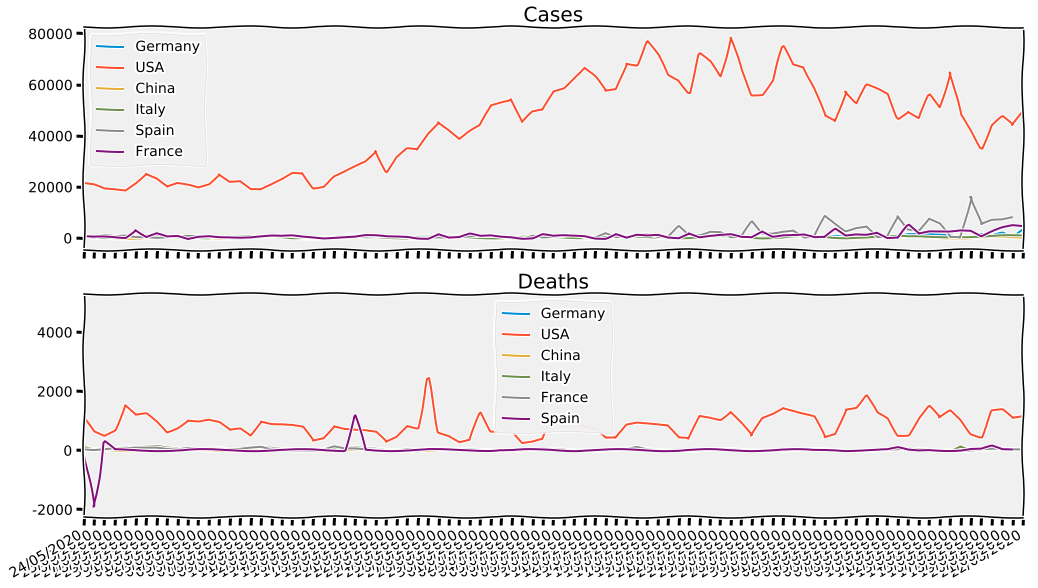

In [7]:
fig = plt.figure()

axesCases = fig.add_subplot(211)
axesDeaths = fig.add_subplot(212)


axesCases.plot(dfGER['dateRep'], dfGER['cases'], label="Germany")
axesCases.plot(dfUSA['dateRep'], dfUSA['cases'], label="USA")
axesCases.plot(dfRPC['dateRep'], dfRPC['cases'], label="China")
axesCases.plot(dfITA['dateRep'], dfITA['cases'], label="Italy")
axesCases.plot(dfSPA['dateRep'], dfSPA['cases'], label="Spain")
axesCases.plot(dfFRA['dateRep'], dfFRA['cases'], label="France")

axesCases.set_title("Cases")
axesCases.legend()
axesCases.set(xlim=(0, last_days)).
axesCases.invert_xaxis()


axesDeaths.plot(dfGER['dateRep'], dfGER['deaths'], label="Germany")
axesDeaths.plot(dfUSA['dateRep'], dfUSA['deaths'], label="USA")
axesDeaths.plot(dfRPC['dateRep'], dfRPC['deaths'], label="China")
axesDeaths.plot(dfITA['dateRep'], dfITA['deaths'], label="Italy")
axesDeaths.plot(dfFRA['dateRep'], dfFRA['deaths'], label="France")
axesDeaths.plot(dfSPA['dateRep'], dfSPA['deaths'], label="Spain")

axesDeaths.set_title("Deaths")
axesDeaths.legend()
axesDeaths.set(xlim=(0, last_days))
axesDeaths.invert_xaxis()

plt.gcf().autofmt_xdate()

plt.show()

#plt.axis([0, last_days, 0, 40000])
#plt.gcf().autofmt_xdate()
#plt.gca().invert_xaxis()
#plt.show()